# Boosting

### Problem Statement -

        - Divide the data (WBCD) into training and test datasets and create a Boosting Model to 
          classify 'Class Variable'.

### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv ("~/desktop/Digi 360/Module 20/Datasets-9/wbcd.csv",encoding='mac_roman')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
# Renaming columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [6]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [7]:
# dropping ID column

df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


### Basic EDA

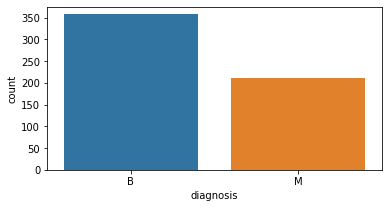

In [8]:
import seaborn as sns
plt.figure(figsize=(6, 3))
sns.countplot(x="diagnosis", data=df)

### Splitting the dataset 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_X = df.iloc[:,1:31]
df_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
df_y = df.iloc[:,0]
df_y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2,random_state=4)

In [13]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
342,16.26,21.88,107.50,826.8,0.11650,0.1283,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.70,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953
138,17.06,21.00,111.80,918.6,0.11190,0.1056,0.15080,0.09934,0.1727,0.06071,...,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.3920,0.1827,0.2623,0.07599
434,10.97,17.20,71.73,371.5,0.08915,0.1113,0.09457,0.03613,0.1489,0.06640,...,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.1555,0.2540,0.09532
47,25.73,17.46,174.20,2010.0,0.11490,0.2363,0.33680,0.19130,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
64,15.34,14.26,102.50,704.4,0.10730,0.2135,0.20770,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946


In [14]:
y_train.head()

342    M
138    M
434    B
47     M
64     M
Name: diagnosis, dtype: object

### Building the model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
# Checking the score on train data
dt.score(X_train,y_train)

1.0

In [18]:
# Checking the score on test data
dt.score(X_test,y_test)

0.9122807017543859

So our model is overfitting here because train score is 100% and test score is 92%. Let's go for ensemble methods.

### RandomForest Classifier

In [19]:
rf = RandomForestClassifier(n_estimators=10)

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
#Finding score for test Data
rf.score(X_test, y_test)

0.9385964912280702

In [22]:
#Finding score for train Data
rf.score(X_train, y_train)

0.9956043956043956

Still we can see overfitting so let's go for Adaboosting

### AdaBoosting

In [23]:
#Ada boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=dt,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [24]:
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [25]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[0.26894142, 0.73105858],
       [0.73105858, 0.26894142],
       [0.26894142, 0.73105858],
       [0.26894142, 0.73105858],
       [0.73105858, 0.26894142],
       [0.26894142, 0.73105858],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.26894142, 0.73105858],
       [0.73105858, 0.26894142]])

In [26]:
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.9301948051948051

### Hyper Parameter Tuning

In [27]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [28]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=dt,
    learning_rate=0.6,
    algorithm="SAMME")

In [29]:
# run grid search
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [30]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [31]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.540558,0.007982,0.028935,0.003707,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.991443,0.995908,0.994925,0.994090,0.001917,2,1.0,1.0,1.0,1.0,0.0
1,1.071370,0.010160,0.049327,0.000775,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.990885,0.996280,0.994925,0.994028,0.002293,3,1.0,1.0,1.0,1.0,0.0
2,1.597537,0.002448,0.074385,0.001579,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.991071,0.996652,0.995113,0.994277,0.002356,1,1.0,1.0,1.0,1.0,0.0
3,0.021897,0.000709,0.002791,0.000043,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.981213,0.988467,0.985526,0.985068,0.002982,5,1.0,1.0,1.0,1.0,0.0
4,0.021525,0.000262,0.002863,0.000076,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.985398,0.987165,0.984868,0.985813,0.000982,4,1.0,1.0,1.0,1.0,0.0
5,0.022474,0.001972,0.002838,0.000053,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.976097,0.983910,0.986654,0.982211,0.004472,6,1.0,1.0,1.0,1.0,0.0


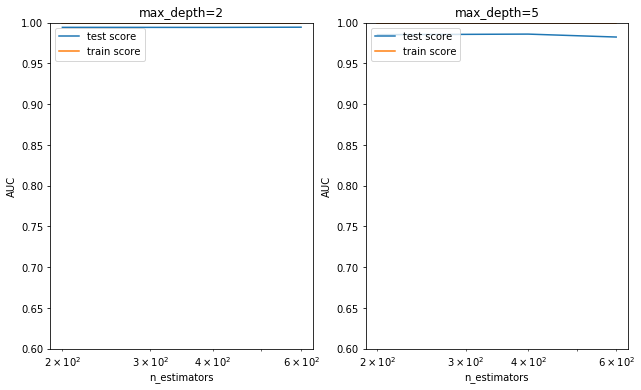

In [32]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results above show that:

The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
At max_depth=2, the model performs slightly better (approx 98% AUC) with a higher test score

Thus, we should go ahead with max_depth=2 and n_estimators=200.

In [33]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [34]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]

array([[0.52000198, 0.47999802],
       [0.51023909, 0.48976091],
       [0.43849286, 0.56150714],
       [0.38661523, 0.61338477],
       [0.63762326, 0.36237674],
       [0.52608206, 0.47391794],
       [0.61343745, 0.38656255],
       [0.60008626, 0.39991374],
       [0.39434034, 0.60565966],
       [0.62256009, 0.37743991]])

In [35]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.9896103896103896

### XG Boosting

In [36]:
# fit model on training data with default hyperparameters
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[2.6572901e-01, 7.3427099e-01],
       [9.4488502e-01, 5.5114970e-02],
       [4.0281475e-02, 9.5971853e-01],
       [2.6363134e-04, 9.9973637e-01],
       [9.9976140e-01, 2.3858515e-04],
       [4.1526252e-01, 5.8473748e-01],
       [9.9953270e-01, 4.6730309e-04],
       [9.9977183e-01, 2.2817185e-04],
       [5.1581860e-04, 9.9948418e-01],
       [9.9981755e-01, 1.8242068e-04]], dtype=float32)

In [38]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.80%


In [39]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      




In [40]:
# fit the model
model_cv.fit(X_train, y_train)     

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [41]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.037205,0.005980,0.004524,0.000076,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.993118,0.989583,0.993045,0.991913,0.001650,3,0.999252,0.999907,0.999395,0.999518,0.000281
1,0.046634,0.004214,0.004865,0.000701,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.992746,0.994048,0.992293,0.993030,0.000744,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.044932,0.001490,0.004472,0.000018,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.992374,0.992188,0.990226,0.991599,0.000971,4,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.030735,0.000390,0.004408,0.000146,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.990699,0.993304,0.992293,0.992098,0.001073,2,0.999112,0.999907,0.999860,0.999626,0.000364
4,0.034019,0.000282,0.004352,0.000050,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.983817,0.990513,0.990414,0.988243,0.003135,6,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.035503,0.000670,0.004385,0.000059,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.992001,0.993676,0.985338,0.990349,0.003597,5,1.000000,1.000000,1.000000,1.000000,0.000000


In [42]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [43]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.037205,0.005980,0.004524,0.000076,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.993118,0.989583,0.993045,0.991913,0.001650,3,0.999252,0.999907,0.999395,0.999518,0.000281
1,0.046634,0.004214,0.004865,0.000701,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.992746,0.994048,0.992293,0.993030,0.000744,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.044932,0.001490,0.004472,0.000018,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.992374,0.992188,0.990226,0.991599,0.000971,4,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.030735,0.000390,0.004408,0.000146,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.990699,0.993304,0.992293,0.992098,0.001073,2,0.999112,0.999907,0.999860,0.999626,0.000364
4,0.034019,0.000282,0.004352,0.000050,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.983817,0.990513,0.990414,0.988243,0.003135,6,1.000000,1.000000,1.000000,1.000000,0.000000


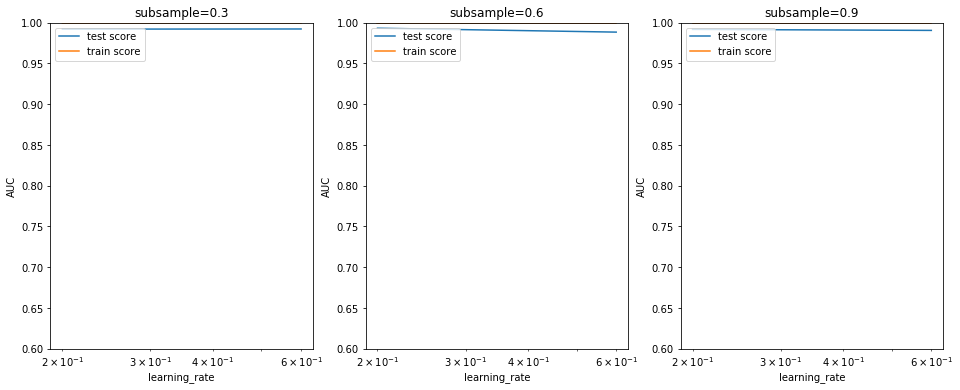

In [44]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [45]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

[19:45:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[2.6572901e-01, 7.3427099e-01],
       [9.4488502e-01, 5.5114970e-02],
       [4.0281475e-02, 9.5971853e-01],
       [2.6363134e-04, 9.9973637e-01],
       [9.9976140e-01, 2.3858515e-04],
       [4.1526252e-01, 5.8473748e-01],
       [9.9953270e-01, 4.6730309e-04],
       [9.9977183e-01, 2.2817185e-04],
       [5.1581860e-04, 9.9948418e-01],
       [9.9981755e-01, 1.8242068e-04]], dtype=float32)

In [47]:
# roc_auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.987987012987013

In [48]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'radius_mean': 0.0,
 'texture_mean': 0.019771462,
 'perimeter_mean': 0.0050336393,
 'area_mean': 0.006757486,
 'smoothness_mean': 0.0031501192,
 'compactness_mean': 0.0017390844,
 'concavity_mean': 0.0027090798,
 'points_mean': 0.053792104,
 'symmetry_mean': 0.0015510144,
 'dimension_mean': 0.0056837904,
 'radius_se': 0.009380138,
 'texture_se': 0.0040931082,
 'perimeter_se': 0.0,
 'area_se': 0.007817217,
 'smoothness_se': 0.008428129,
 'compactness_se': 0.0012023861,
 'concavity_se': 0.0,
 'points_se': 0.0013081712,
 'symmetry_se': 0.0040655895,
 'dimension_se': 0.0,
 'radius_worst': 0.6747759,
 'texture_worst': 0.004109848,
 'perimeter_worst': 0.0739764,
 'area_worst': 0.010173431,
 'smoothness_worst': 0.0044069225,
 'compactness_worst': 0.0,
 'concavity_worst': 0.02062731,
 'points_worst': 0.060455296,
 'symmetry_worst': 0.0035000218,
 'dimension_worst': 0.011492409}

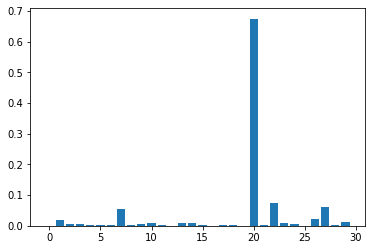

In [49]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### Conclusion

    - With Random Forest classifier Accuracy of our model is 92% 
    - With Adaboosting the accuracy of the model is 98.9%
    - With XGBoosting the accuracy of the model is 98.7%
    - Most important feature is `radius_worst`